# Forward Euler Evolution

In [ ]:
from copy import deepcopy

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

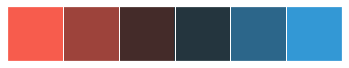

In [103]:
def define_palette():
    args = (15, 240)
    kwargs = dict(s=90, l=60, center="dark")
    p = sns.diverging_palette(*args, **kwargs)
    c = sns.diverging_palette(*args, **kwargs, as_cmap=True)
    
    return p, c

palette, colormap = define_palette()
sns.set_palette(palette)
sns.palplot(palette)

## FEE step

In [65]:
def fee(rho_t, alpha):
    rho_t1 = deepcopy(rho_t)
    
    rho_t1 -= ((alpha / 2) * (np.roll(rho_t, 1) - np.roll(rho_t, -1)))
    
    return rho_t1

# Test it
a = np.arange(10, dtype=np.float64)
np.vstack([a, fee(a, 1)])

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [-4.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,  5.]])

## PBC

In [66]:
def pbc():
    n_t = 107
    n_x = 1000

    alpha = 1;

    k = 2
    shift = 0.
    rho_t0 = [np.sin(k*(i/n_x - shift)*np.pi)  for i in range(n_x)]
    
    rho_tm = deepcopy(rho_t0)
    rho = rho_tm

    for i in range(n_t):
        # evolve
        rho_tm1 = fee(rho_tm, alpha)

        #println(round.(rho_tm1, digits=1))
        # update current
        rho_tm = deepcopy(rho_tm1)

        rho = np.vstack([rho, rho_tm1])

    return rho.T

rho_pbc = pbc()

### analyze

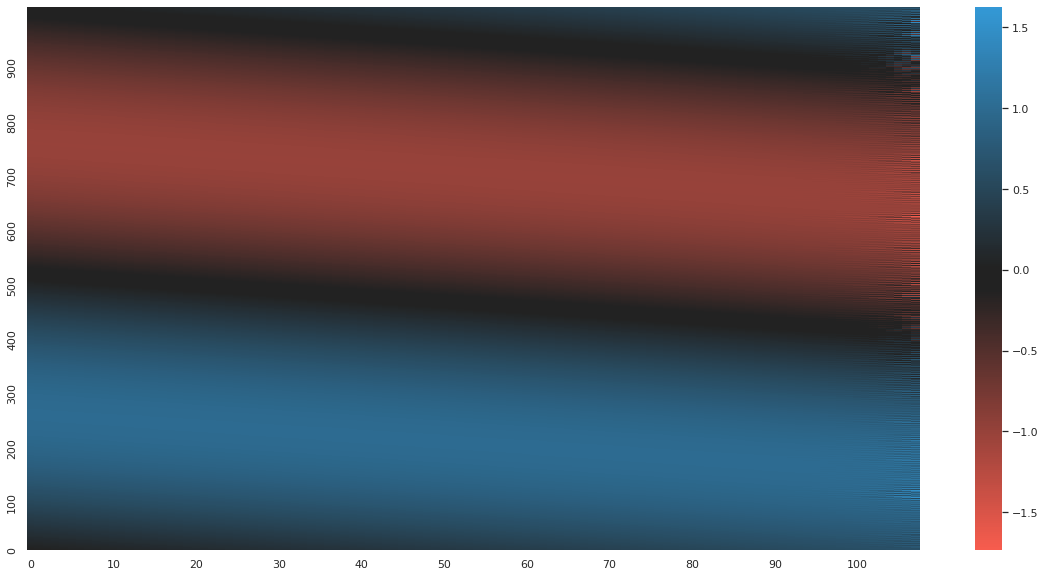

In [104]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(rho_pbc,
                 xticklabels=(len(rho_pbc[0]) // 10),
                 yticklabels=(len(rho_pbc) // 10),
                 cmap=colormap)
ax.invert_yaxis()